In [2]:
from manim import *

Manim Community v0.17.3

In [3]:
X1 = 1
X2 = 6
A = 1
B = -(X1+X2)*A
C = X1*X2*A

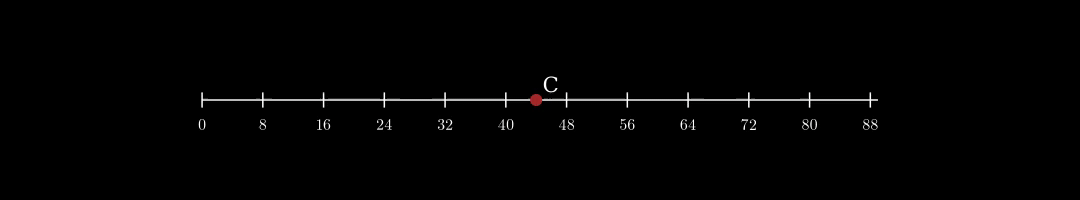

In [2]:
%%manim -qm -v WARNING --format=gif -r 1080,200 NumberLineExample
# https://github.com/3b1b/manim/issues/1393#issue-809664600

class NumberLineExample(Scene):
    def construct(self):
        number_line = NumberLine(
            x_range=[0, 89, 8],
            unit_size=.1,
#             numbers_with_elongated_ticks=[8, 80],
            include_numbers=True,
            font_size=20,
        )
        
        point_8 = number_line.n2p(8)
        dot_8 = Dot(point_8, color="blue")
        
        point_80 = number_line.n2p(80)
        dot_80 = Dot(point_80, color="blue")
        
        point_44 = number_line.n2p(44)
        dot_44 = Dot(point_44, color="brown")
        
        left_brace = BraceBetweenPoints(point_8, point_44, UP, buff=.4)
        right_brace = BraceBetweenPoints(point_44, point_80, UP, buff=.4)
        
        left_d = Text("D", font_size=20).next_to(left_brace, UP)
        right_d = Text("D", font_size=20).next_to(right_brace, UP)
        
        text_a = Text("A", font_size=20).next_to(point_8, UP+LEFT, buff=.1)
        text_b = Text("B", font_size=20).next_to(point_80, UP+RIGHT, buff=.1)
        
        text_c = Text("C", font_size=20).next_to(point_44, UP+RIGHT, buff=.1)
        
#         number_line.add_numbers([44])
    
        AB = VGroup(dot_8, dot_80, text_a, text_b)
        self.add(number_line, dot_44, text_c)
        self.play(GrowFromEdge(left_brace, RIGHT), GrowFromEdge(right_brace, LEFT), run_time=2)
        self.play(Create(left_d), Create(right_d), Create(AB))
        self.wait(2)

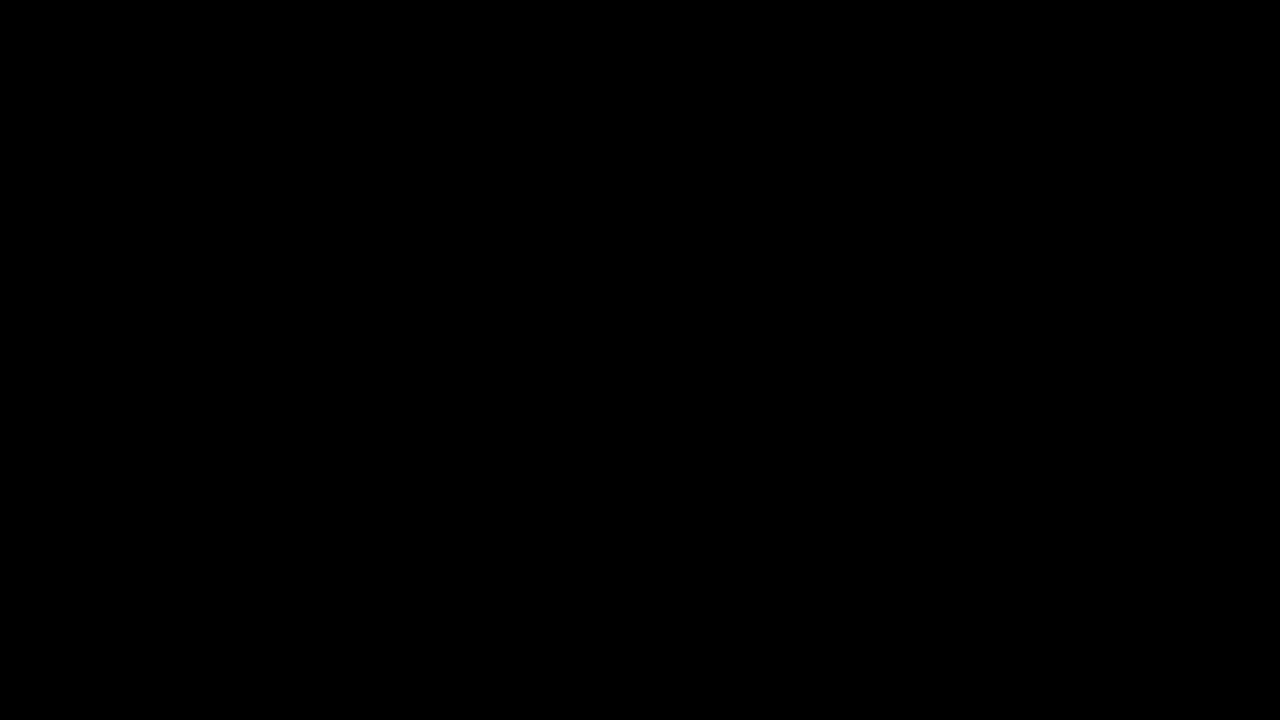

In [4]:
%%manim -qm -v WARNING --format=gif ReviewExample

def func(x):
    return x**2 + B*x + C


class ReviewExample(Scene):
    def construct(self):
        ax = Axes(
            x_range=[-1, 8], y_range=[0, 10, 1], axis_config={"include_numbers": True}
        ).scale(.5)
        ax.to_edge(LEFT)
        labels = ax.get_axis_labels(x_label=MathTex("x").scale(0.7), y_label=MathTex("f(x)").scale(0.7))
        
        fn = MathTex(
            f"f(x) = x^2 - {-B}x + {C}"
        ).to_edge(RIGHT)

        graph = ax.plot(func, color=MAROON)

        t = ValueTracker(-1)
        initial_point = [ax.coords_to_point(t.get_value(), func(t.get_value()))]
        dot = Dot(point=initial_point)
        dot.add_updater(lambda x: x.move_to(ax.c2p(t.get_value(), func(t.get_value()))))
        
        # tem um pouco de flickering no update do decimal, vide https://www.reddit.com/r/manim/comments/q93qw0/is_there_any_way_to_fix_the_shakiness_of_a/
        decimal_x = DecimalNumber(dot.get_center()[0], num_decimal_places=2, include_sign=False, unit=None, edge_to_fix=UP)
        decimal_y = DecimalNumber(dot.get_center()[1], num_decimal_places=2, include_sign=False, unit=None, edge_to_fix=LEFT)
        decimal_x.add_updater(lambda d: d.set_value(t.get_value()))
        decimal_y.add_updater(lambda d: d.set_value(func(t.get_value())))
        
        self.play(DrawBorderThenFill(ax), Write(labels))
        self.play(Create(graph), Write(fn))
        
        # TODO talvez desse pra usar o Variable, vide https://docs.manim.community/en/stable/reference/manim.mobject.text.numbers.Variable.html#manim.mobject.text.numbers.Variable
        fn_value = VGroup(MathTex("f("), decimal_x, MathTex(") = "), decimal_y).arrange(RIGHT).next_to(fn, direction=DOWN)
    
        # TODO talvez desse pra usar o always redraw, vide https://stackoverflow.com/a/76362961
        # fn_value = always_redraw(lambda: MathTex(
        #     "f({:.3f}) = {:.3f}".format(t.get_value(), func(t.get_value()))
        # ))
        
        dot_x1 = Dot(point=[ax.coords_to_point(X1, func(X1))])
        x1_text = MathTex("x_1")
        x1_text.next_to(dot_x1, RIGHT+UP, buff=0.1)
        
        dot_x2 = Dot(point=[ax.coords_to_point(X2, func(X2))])
        x2_text = MathTex("x_2")
        x2_text.next_to(dot_x2, RIGHT+UP, buff=0.1)
        
        dot_inf = Dot(point=[ax.coords_to_point(8, func(8))])

        self.play(Write(fn_value), Write(dot))
        self.wait(.5)
        self.play(t.animate.set_value(X1), run_time=2, rate_func=rate_functions.ease_in_out_sine)
        self.wait(.5)
        self.play(Create(dot_x1), Write(x1_text))
        self.wait()
        self.play(t.animate.set_value(X2), run_time=2, rate_func=rate_functions.ease_in_out_sine)
        self.wait(.5)
        self.play(Create(dot_x2), Write(x2_text))
        self.play(t.animate.set_value(8), run_time=2, rate_func=rate_functions.ease_in_out_sine)
        self.wait(.5)
        
        self.remove(dot)
        self.wait(.1)

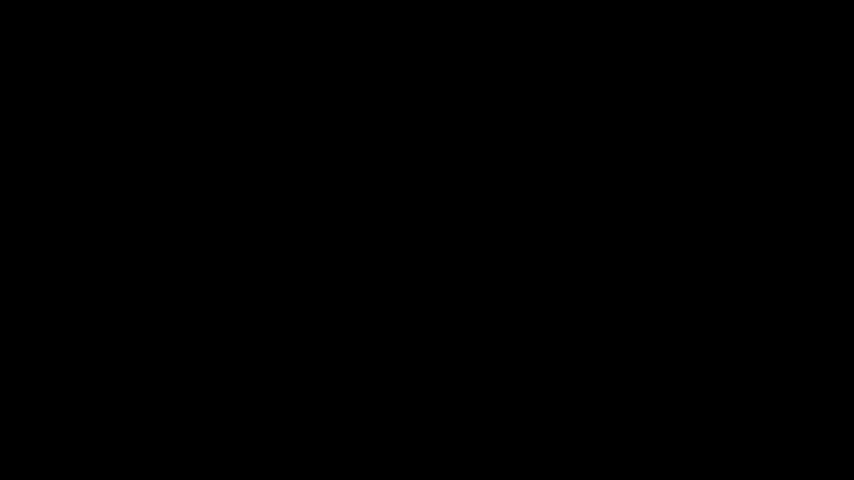

In [6]:
%%manim -ql -v WARNING --format=gif BhaskaraEquation

class BhaskaraEquation(Scene):
    def construct(self):
        # para as transformações depois, é melhor usar o over ao invés do frac
        # vide https://www.reddit.com/r/manim/comments/10c12tp/comment/j4dhx0q/?utm_source=reddit&utm_medium=web2x&context=3
        base_form = MathTex(
            "x", "=", "{ {-b", "\pm", "\sqrt{", "b", "^2", "-", "4a", "c} }", "\over", "{2a} }"
        ).scale(.8).to_edge(UP, buff=1)
        
        text2 = MathTex(
            "=", "{ {-b}", "\over", "{2a} }", "\pm", "{ ", "\sqrt{", "b", "^2", "-", "4a", "c} ", "\over", "{2a} }"
        ).scale(.8).next_to(base_form, DOWN)
        
        text3 = MathTex(
            "=", "{ {-b}", "\over", "{2a} }", "\pm", "{ ", "\sqrt{ ", "{ {b", "^2", "-", "4a", "c}", "\over", "{4a^2} } } }"
        ).scale(.8).next_to(text2, DOWN)
        
        # self.add(base_form,text2,text3)
        
        text4 = MathTex(
            "=","{ {-b}", "\over", "{2a} }", "\pm", "{ ", "\sqrt{ ", "{ {b^2}", "\over", "{4a^2} }", "-", "{ c", "\over", "a } } }"
        ).scale(.8).next_to(text3, DOWN)

        
        text5 = MathTex(
            "=","{ {-b}", "\over", "{2a} }", "\pm", "{ ", "\sqrt{ ", r"{ \left( { {-b}", "\over", r"{2a} } \right) }^2", "-", "{ c", "\over", "a } } }"
        ).scale(.8).next_to(text4, DOWN)

            
        base_form_fixed = base_form.copy()
        
        self.play(Write(base_form))
        self.add(base_form_fixed)
        self.wait(0.5)
        self.play(
            TransformMatchingShapes(base_form[1], text2[0]),  # =
        )
        self.play(
            Write(text2[2]),  # left \over
            Write(text2[12]),  # right \over
        )
        self.play(
            TransformMatchingShapes(base_form[3], text2[4]),  # = \pm
        )
        self.play(
            TransformMatchingShapes(base_form[6].copy(), text2[3]),  # 2a -> left
            TransformMatchingShapes(base_form[6].copy(), text2[13]),  # 2a -> right
        )
        self.play(
            TransformMatchingShapes(base_form[2], text2[1]),  # -b/2a
            TransformMatchingShapes(base_form[4:10], text2[5:12]),  # \sqrt
        )
        
        self.wait(1)
        
        # "=", "{ {-b}", "\over", "{2a} }", "\pm", "{ {", "\sqrt{", "b", "^2", "-", "4a", "c} }", "\over", "{2a} }"
        # "=", "{ {-b}", "\over", "{2a} }", "\pm", "{ ", "\sqrt{ {", "{b", "^2", "-", "4a", "c}", "\over", "{4a^2}", } } }"

        text2_fixed = text2.copy()
        self.add(text2_fixed)
        
        self.play(
            TransformMatchingShapes(text2[:5], text3[:5]),  # = mean \pm
        )
        self.play(
            TransformMatchingShapes(text2[5:7], text3[5:7]),  # sqrt
        )
        self.play(
            Write(text3[12]),  # right \over
        )
        self.play(
            TransformMatchingShapes(text2[7:12], text3[7:12]), # delta
        )
        self.play(
            TransformMatchingShapes(text2[13], text3[13]),  # 2a -> 4a^2
        )

        self.wait(1)
        
        text3_fixed = text3.copy()
        self.add(text3_fixed)
        
        self.play(
            TransformMatchingShapes(text3[:6], text4[:6]),  # = mean \pm
        )
        self.play(
            TransformMatchingShapes(text3[6], text4[6]),  # sqrt
        )
        self.play(
            Write(text4[8]),  # sqrt left \over
            Write(text4[12]),  # sqrt right \over
        )
        self.play(
            Write(text4[10]),  # sqrt -
        )
        self.play(
            TransformMatchingShapes(text3[13].copy(), text4[9]),  # 4a^2
            TransformMatchingShapes(text3[13].copy(), text4[13]),  # 4a^2
        )
        self.play(
            TransformMatchingShapes(text3[7:9], text4[7]),  # b^2
            TransformMatchingShapes(text3[10:12], text4[11]),  # 4ac -> c
        )
        
        text4_fixed = text4.copy()
        self.add(text4_fixed)
        
        self.play(
            TransformMatchingShapes(text4[:6], text5[:6]),  # = mean \pm
        )
        self.play(
            TransformMatchingShapes(text4[6], text5[6]),  # sqrt
        )
        self.play(
            TransformMatchingShapes(text4[7:10].copy(), text5[7:11]),
        )
        self.play(
            Write(text5[11:]),
        )
#         self.play(
#             TransformMatchingShapes(text4[13].copy(), text5[9]),  # 4a^2
#             TransformMatchingShapes(text4[13].copy(), text5[13]),  # 4a^2
#         )
#         self.play(
#             TransformMatchingShapes(text4[7:9], text5[7]),  # b^2
#             TransformMatchingShapes(text4[10:12], text5[11]),  # 4ac -> c
#         )
        
#             "=","{ {-b}", "\over", "{2a} }", "\pm", "{ ", "\sqrt{ ", "{ {b^2}", "\over", "{4a^2} }", "-", "{ c", "\over", "a } } }"
#             "=","{ {-b}", "\over", "{2a} }", "\pm", "{ ", "\sqrt{ ", "{ \left( { {-b}", "\over", "{2a} } \right) }^2", "-", "{ c", "\over", "a } } }"

        
        self.wait(5)

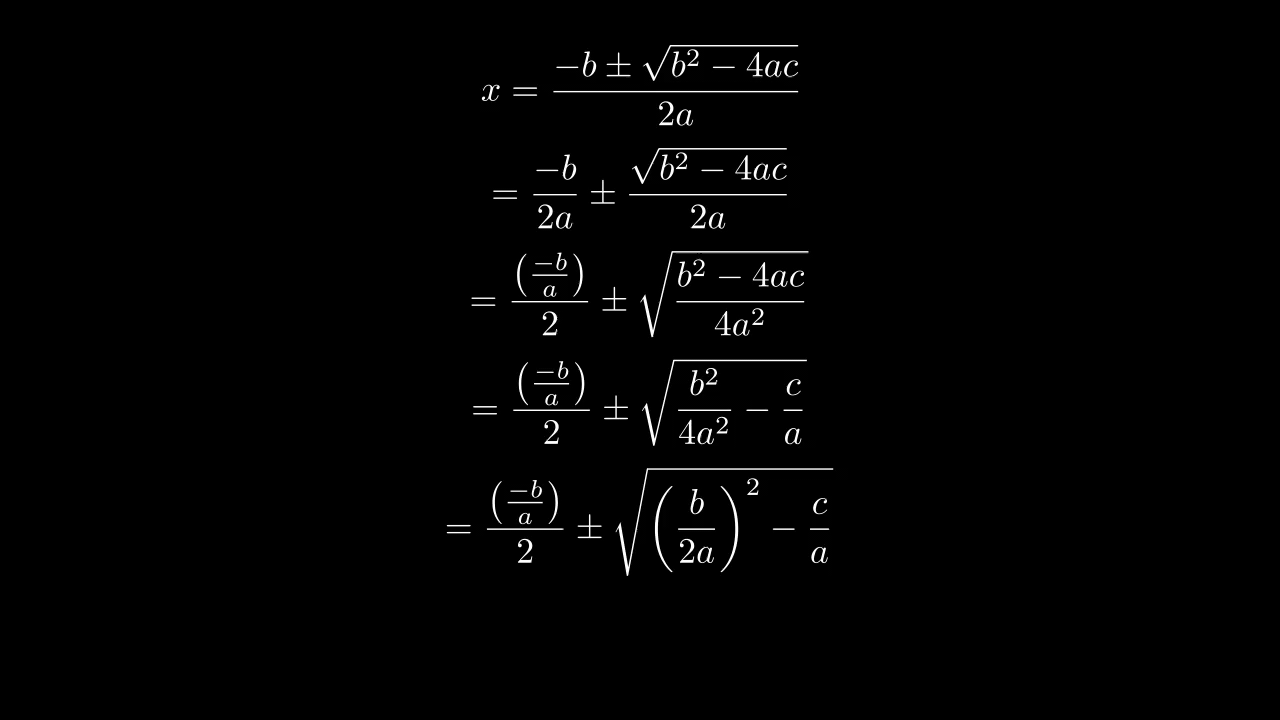

In [7]:
%%manim -qm -v WARNING --format=gif BhaskaraEquation

class BhaskaraEquation(Scene):
    def construct(self):
        # para as transformações depois, é melhor usar o over ao invés do frac
        # vide https://www.reddit.com/r/manim/comments/10c12tp/comment/j4dhx0q/?utm_source=reddit&utm_medium=web2x&context=3
        base_form = MathTex(
            "x", "=", "{ {-b", "\pm", "\sqrt{b^2-4ac} }", "\over", "{2a} }"
        ).scale(.8).to_edge(UP)
        text2 = MathTex(
            "=", "{ {-b}", "\over", "{2a} }", "\pm", "{ {\sqrt{b^2-4ac} }", "\over", "{2a} }"
        ).scale(.8).next_to(base_form, DOWN)
        
        text3 = MathTex(
            "=", r"{ { \left({-b}\over{a} \right) }", "\over", "{2} }", "\pm", "{ { \sqrt{ {b^2-4ac} \over {4a^2} } } }"
        ).scale(.8).next_to(text2, DOWN)
        
        text4 = MathTex(
            "=", r"{ { \left({-b}\over{a} \right) }", "\over", "{2} }", "\pm", "{ \sqrt{ { {b^2}\over{4a^2} } - { c \over a } } }"
        ).scale(.8).next_to(text3, DOWN)

        
        text5 = MathTex(
            "=", r"{ { \left({-b}\over{a} \right) }", "\over", "{2} }", "\pm", r"{ \sqrt{ { \left( {b}\over{2a} \right)^2  } - { c \over a } } }"
        ).scale(.8).next_to(text4, DOWN)

            
        base_form_fixed = text2.copy()
        
        self.add(base_form, text2, text3, text4, text5)
        
        # self.play(Write(base_form))
        # self.add(base_form_fixed)
        # self.wait(0.5)
        # self.play(
        #     TransformMatchingShapes(base_form[1], text2[0]),  # =
        # )
        # self.play(
        #     Write(text2[2]),  # left \over
        #     Write(text2[6]),  # right \over
        # )
        # self.play(
        #     TransformMatchingShapes(base_form[3], text2[4]),  # = \pm
        # )
        # self.play(
        #     TransformMatchingShapes(base_form[6].copy(), text2[3]),  # 2a -> left
        #     TransformMatchingShapes(base_form[6].copy(), text2[7]),  # 2a -> right
        # )
        # self.play(
        #     TransformMatchingShapes(base_form[2], text2[1]),  # \sqrt
        #     TransformMatchingShapes(base_form[4], text2[5]),  # \sqrt
        # )
        
        self.wait(3)

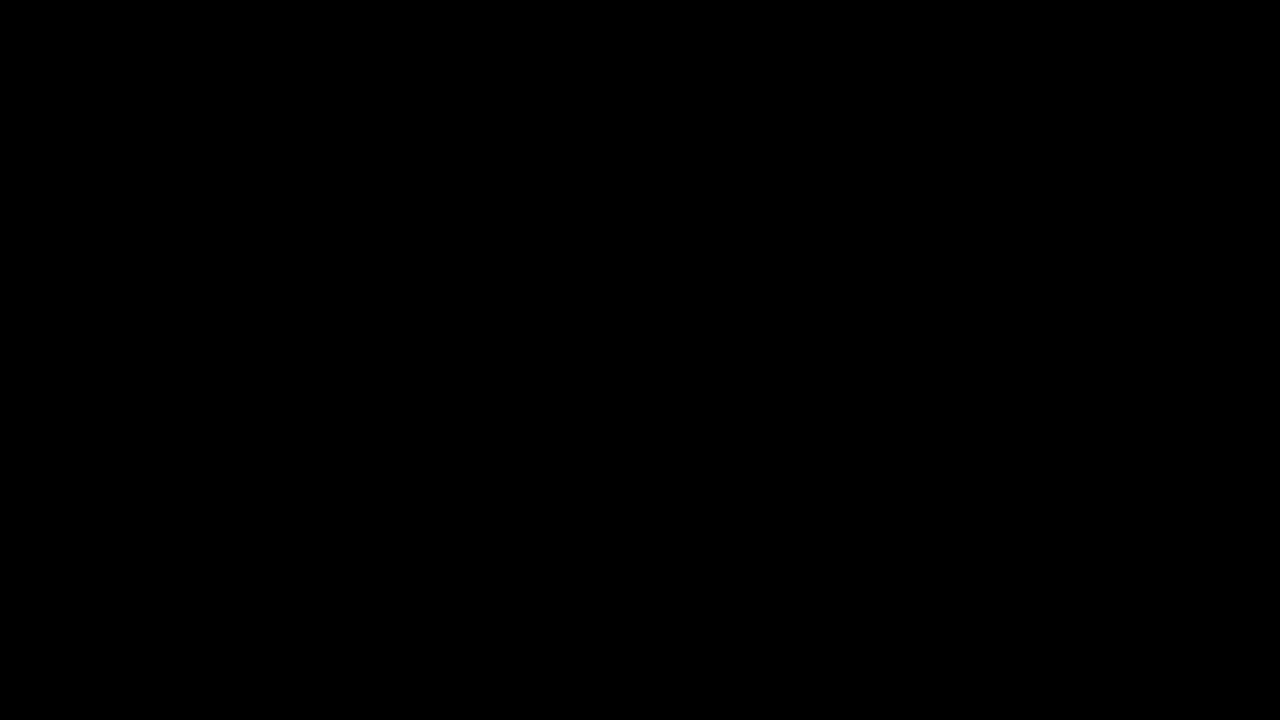

In [8]:
%%manim -qm -v WARNING --format=gif BhaskaraEquation

class BhaskaraEquation(Scene):
    def construct(self):
        # para as transformações depois, é melhor usar o over ao invés do frac
        # vide https://www.reddit.com/r/manim/comments/10c12tp/comment/j4dhx0q/?utm_source=reddit&utm_medium=web2x&context=3
        base_form = MathTex(
            "x", "=", "{ {-b", "\pm", "\sqrt{b^2-4ac} }", "\over", "{2a} }"
        ).move_to(UP)
        text2 = MathTex(
            "=", "{ {-b}", "\over", "{2a} }", "\pm", "{ {\sqrt{b^2-4ac} }", "\over", "{2a} }"
        ).next_to(base_form, DOWN)
        
        base_form_fixed = base_form.copy()
        
        self.play(Write(base_form))
        self.add(base_form_fixed)
        self.wait(0.5)
        self.play(
            TransformMatchingShapes(base_form[1], text2[0]),  # =
        )
        self.play(
            Write(text2[2]),  # left \over
            Write(text2[6]),  # right \over
        )
        self.play(
            TransformMatchingShapes(base_form[3], text2[4]),  # = \pm
        )
        self.play(
            TransformMatchingShapes(base_form[6].copy(), text2[3]),  # 2a -> left
            TransformMatchingShapes(base_form[6].copy(), text2[7]),  # 2a -> right
        )
        self.play(
            TransformMatchingShapes(base_form[2], text2[1]),  # \sqrt
            TransformMatchingShapes(base_form[4], text2[5]),  # \sqrt
        )
        
        self.wait(3)

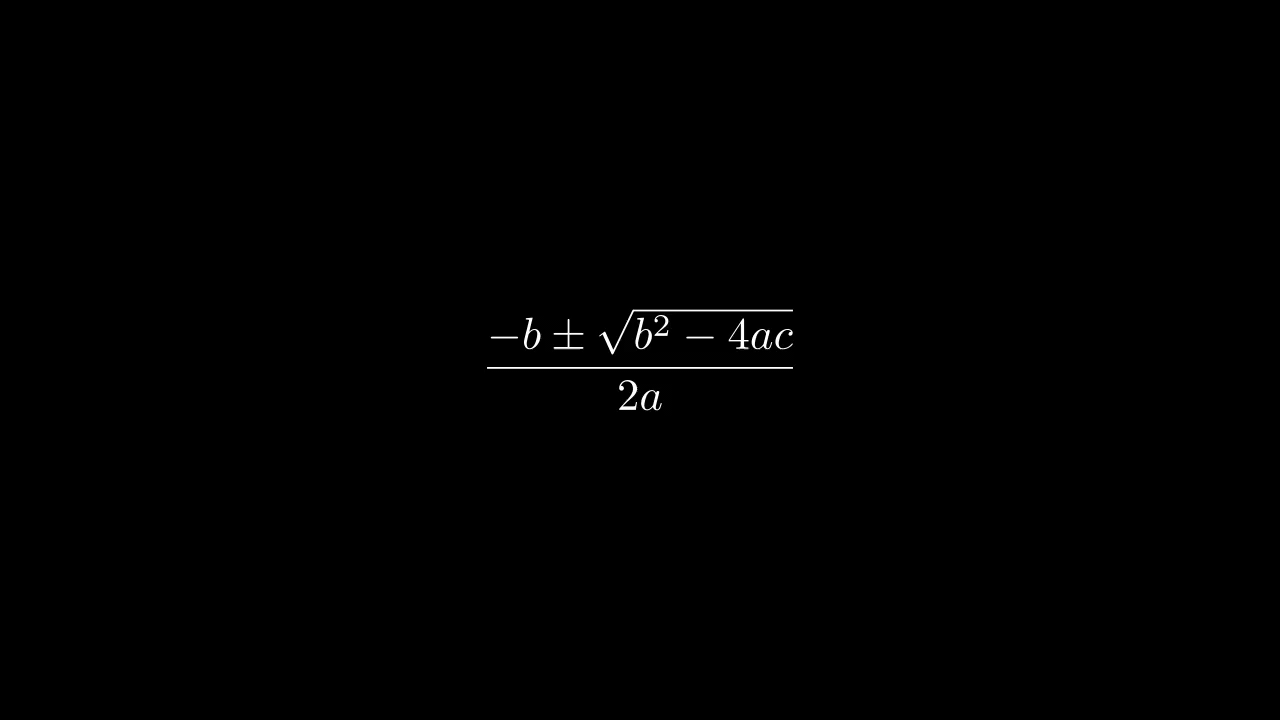

In [9]:
%%manim -qm -v WARNING --format=gif BhaskaraEquation

class BhaskaraEquation(Scene):
    def construct(self):
        text = MathTex(
            r"\frac{-b \pm \sqrt{b^2-4ac}}{2a} \\ "
        )
        text2 = MathTex(
            r"\frac{-b}{2a} \pm \frac{\sqrt{b^2-4ac}}{2a}"
        )
        self.play(FadeTransform(
            text,
            text2,
            run_time = 2,
        ))


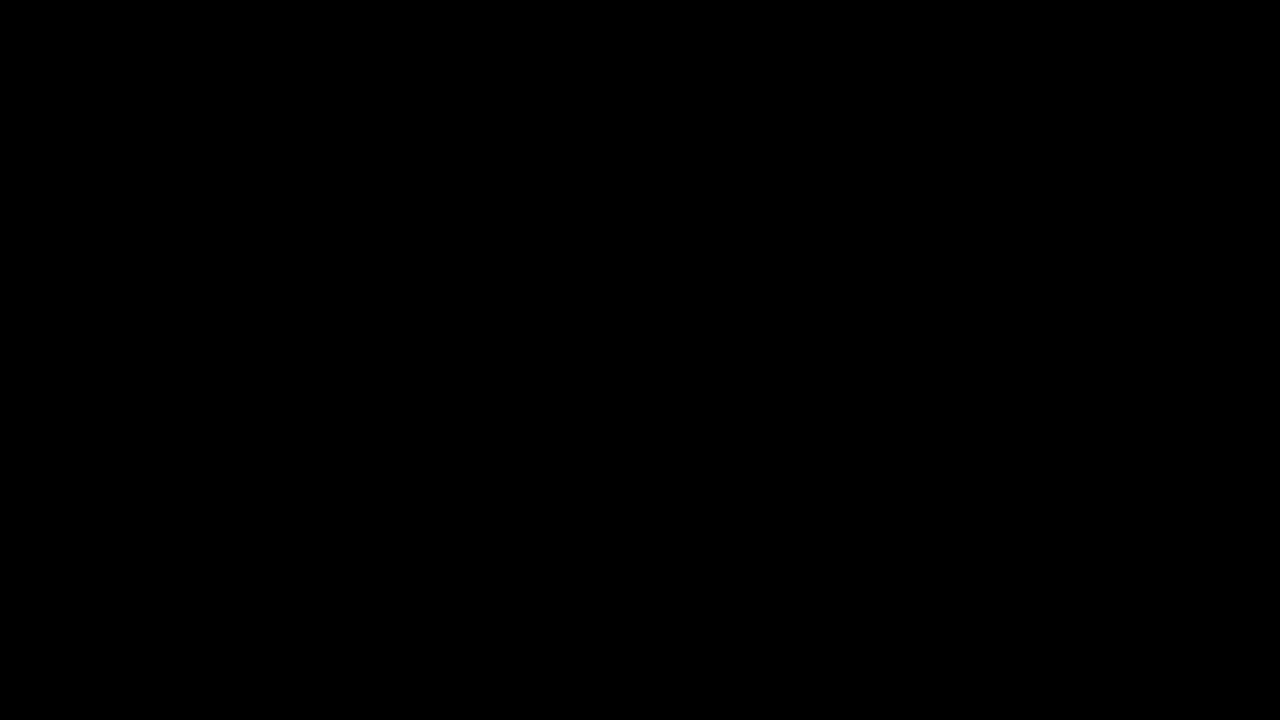

In [10]:
%%manim -qm -v WARNING --format=gif BhaskaraEquation

class BhaskaraEquation(Scene):
    def construct(self):
        text=MathTex(
            r"x &= \frac{-b \pm \sqrt{b^2-4ac}}{2a} \\ "
            r"&= \frac{-b}{2a} \pm \frac{\sqrt{b^2-4ac}}{2a}"
        )
        self.play(Write(text))
        self.wait(duration=5)
#         frameboxes = [SurroundingRectangle(t, buff = .1) for t in text[::2]]
#         self.play(
#             Create(frameboxes[0]),
#         )
#         self.wait()
#         for a, b in zip(frameboxes, frameboxes[1:]):
#             self.play(
#                 ReplacementTransform(a,b),
#             )
#             self.wait()